# 7 methods to perform Time Series forecasting
- Method 1 – Start with a Naive Approach
    用最后一个数字做预测
- Method 2 – Simple average
     用均值做预测
- Method 3 – Moving average
    用移动平均值做预测
* Method 4 – Single Exponential smoothing
* Method 5 – Holt’s linear trend method
* Method 6 – Holt’s Winter seasonal method
* Method 7 – ARIMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
df_raw = pd.read_csv('http://www.guofei.site/StatisticsBlog/origin_files/timeseries/Train_SU63ISt.csv', nrows = 11856)
df_raw.index = pd.to_datetime(df_raw.Datetime,format='%d-%m-%Y %H:%M')
ts=df_raw.resample('D').mean().loc[:,'Count']
ts.name='data'
train=ts[0:433]
test=ts[433:]

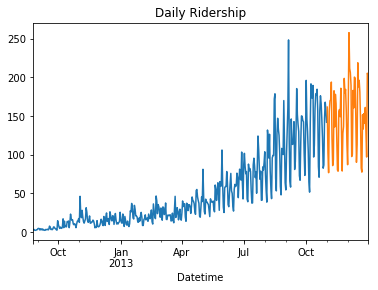

In [3]:
train.plot( title= 'Daily Ridership')
test.plot(title= 'Daily Ridership')
plt.show()

## Method 1: Start with a Naive Approach
**Naive Method：**简单地将最近一个观测值作为下一期的预测值来做预测
$\hat y_{t+1}=y_t$

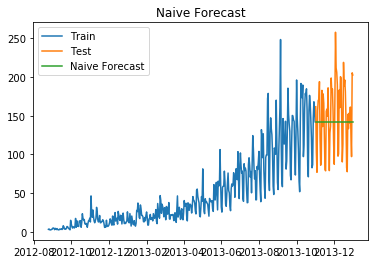

-0.028639469900951564

In [4]:
y_hat = test.copy()
y_hat[:] = train.iloc[-1]

plt.plot(train.index, train, label='Train')
plt.plot(test.index,test, label='Test')
plt.plot(y_hat.index,y_hat, label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

# r-squared
from sklearn.metrics import r2_score
r2_score(test, y_hat)

## Method 2: – Simple Average
**Simple Average：**用历史全部观测值的均值作为下一期的预测值来做预测
$\hat y_{t+1}=\dfrac{1}{n}\sum_{i=1}^ty_i$

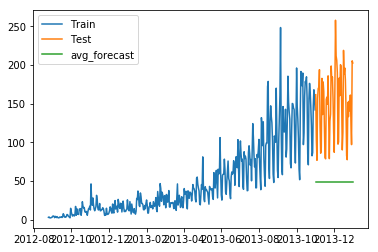

-5.4400393472409689

In [5]:
y_hat = test.copy()
y_hat[:] = train.mean()

plt.plot(train.index, train, label='Train')
plt.plot(test.index,test, label='Test')
plt.plot(y_hat.index,y_hat, label='avg_forecast')
plt.legend(loc='best')
plt.show()

# r-squared
from sklearn.metrics import r2_score
r2_score(test, y_hat)

## Method 3 – Moving Average
**移动平均法**用近期固定期数的历史观测值的均值作为下一期的预测值来做预测
$\hat y_l=\dfrac{1}{p}(y_{i-1}+y_{i-2}+...+y_{i-p})$

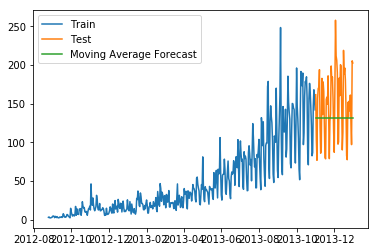

-0.16458597445847567

In [6]:
y_hat = test.copy()
y_hat[:] = train.rolling(60).mean().iloc[-1]

plt.plot(train.index, train, label='Train')
plt.plot(test.index,test, label='Test')
plt.plot(y_hat.index,y_hat, label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

# r-squared
from sklearn.metrics import r2_score
r2_score(test, y_hat)

#### Weighted moving average
**加权移动平均法**
$\hat y_l=\dfrac{1}{m} \sum w_k y_{i-k}$

## Method 4 – Simple Exponential Smoothing

In [7]:
from statsmodels.tsa import holtwinters

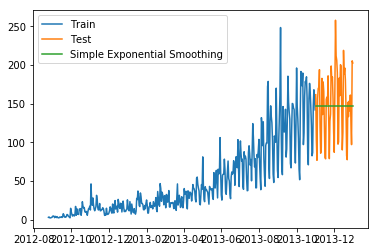

-0.0026297183542114411

In [8]:
y_hat = test.copy()
model=holtwinters.SimpleExpSmoothing(train).fit(smoothing_level=0.6,optimized=False)
y_hat[:]=model.forecast(len(test))

plt.plot(train.index, train, label='Train')
plt.plot(test.index,test, label='Test')
plt.plot(y_hat.index,y_hat, label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.show()

# r-squared
from sklearn.metrics import r2_score
r2_score(test, y_hat)

## Method 5 – Holt’s Linear Trend method

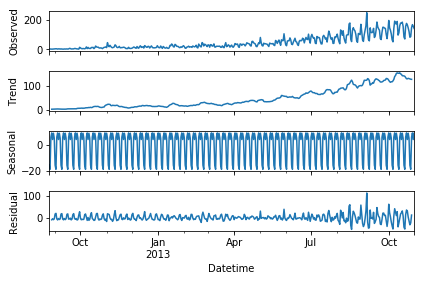

In [9]:
import statsmodels.api as sm
model=sm.tsa.seasonal_decompose(train)

# 分解后的情况
model.trend,model.seasonal,model.resid 
model.plot()
plt.show()

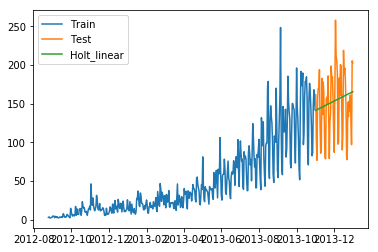

0.011259788482330224

In [10]:
y_hat = test.copy()
model = sm.tsa.Holt(train).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat=model.forecast(len(test))

plt.plot(train.index, train, label='Train')
plt.plot(test.index,test, label='Test')
plt.plot(y_hat.index,y_hat, label='Holt_linear')
plt.legend(loc='best')
plt.show()

# r-squared
from sklearn.metrics import r2_score
r2_score(test, y_hat)

## Method 6 – Holt-Winters Method

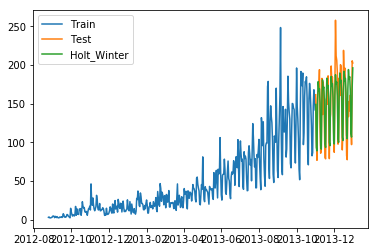

0.69377733437604616

In [11]:
import statsmodels.api as sm
y_hat = test.copy()
model = sm.tsa.ExponentialSmoothing(train,seasonal_periods=7 ,trend='add', seasonal='add').fit()
y_hat=model.forecast(len(test))

plt.plot(train.index, train, label='Train')
plt.plot(test.index,test, label='Test')
plt.plot(y_hat.index,y_hat, label='Holt_Winter')
plt.legend(loc='best')
plt.show()

# r-squared
from sklearn.metrics import r2_score
r2_score(test, y_hat)

## Method 7 – ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


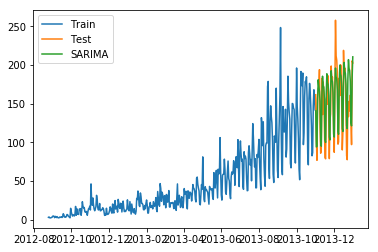

0.63842284486722256

In [12]:
import statsmodels.api as sm
y_hat = test.copy()
model = sm.tsa.statespace.SARIMAX(train, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat=model.forecast(len(test))

plt.plot(train.index, train, label='Train')
plt.plot(test.index,test, label='Test')
plt.plot(y_hat.index,y_hat, label='SARIMA')
plt.legend(loc='best')
plt.show()

# r-squared
from sklearn.metrics import r2_score
r2_score(test, y_hat)